<a href="https://colab.research.google.com/github/z4n0/LessonsExtractor/blob/main/challengeLuca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/challenge2

/content/drive/.shortcut-targets-by-id/1Mxsv_mldVrJPtq1ffnBJa77i4c5Pgx9f/challenge2


### Import libraries

In [3]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [4]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [5]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np

# Data  pre processing and visualization

In [6]:
import numpy as np
import matplotlib.pyplot as plt

training_data = np.load('/content/drive/MyDrive/challenge2/training_dataset/training_data.npy', allow_pickle=True)
categories = np.load('/content/drive/MyDrive/challenge2/training_dataset/categories.npy', allow_pickle=True)
valid_periods = np.load('/content/drive/MyDrive/challenge2/training_dataset/valid_periods.npy', allow_pickle=True)

In [7]:
#conversion of the training data to float32 in order to reduce memory consumption
training_data.astype(np.float32)

array([[0.        , 0.        , 0.        , ..., 0.6027778 , 0.3675926 ,
        0.3314815 ],
       [0.        , 0.        , 0.        , ..., 0.6       , 0.46      ,
        0.396     ],
       [0.        , 0.        , 0.        , ..., 0.9604813 , 0.94650626,
        0.9771402 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.5263158 , 0.5822368 ,
        0.55263156],
       [0.        , 0.        , 0.        , ..., 0.44559586, 0.58549225,
        0.4041451 ],
       [0.        , 0.        , 0.        , ..., 0.54268295, 0.6097561 ,
        0.5914634 ]], dtype=float32)

In [8]:
# Basic statistics
print(f"Training Data Shape: {training_data.shape}")
print(f"Categories Shape: {categories.shape}")
print(f"Valid Periods Shape: {valid_periods.shape}")

# Distribution of categories
unique, counts = np.unique(categories, return_counts=True)
print("Category Distribution:", dict(zip(unique, counts)))

Training Data Shape: (48000, 2776)
Categories Shape: (48000,)
Valid Periods Shape: (48000, 2)
Category Distribution: {'A': 5728, 'B': 10987, 'C': 10017, 'D': 10016, 'E': 10975, 'F': 277}


## data visualization

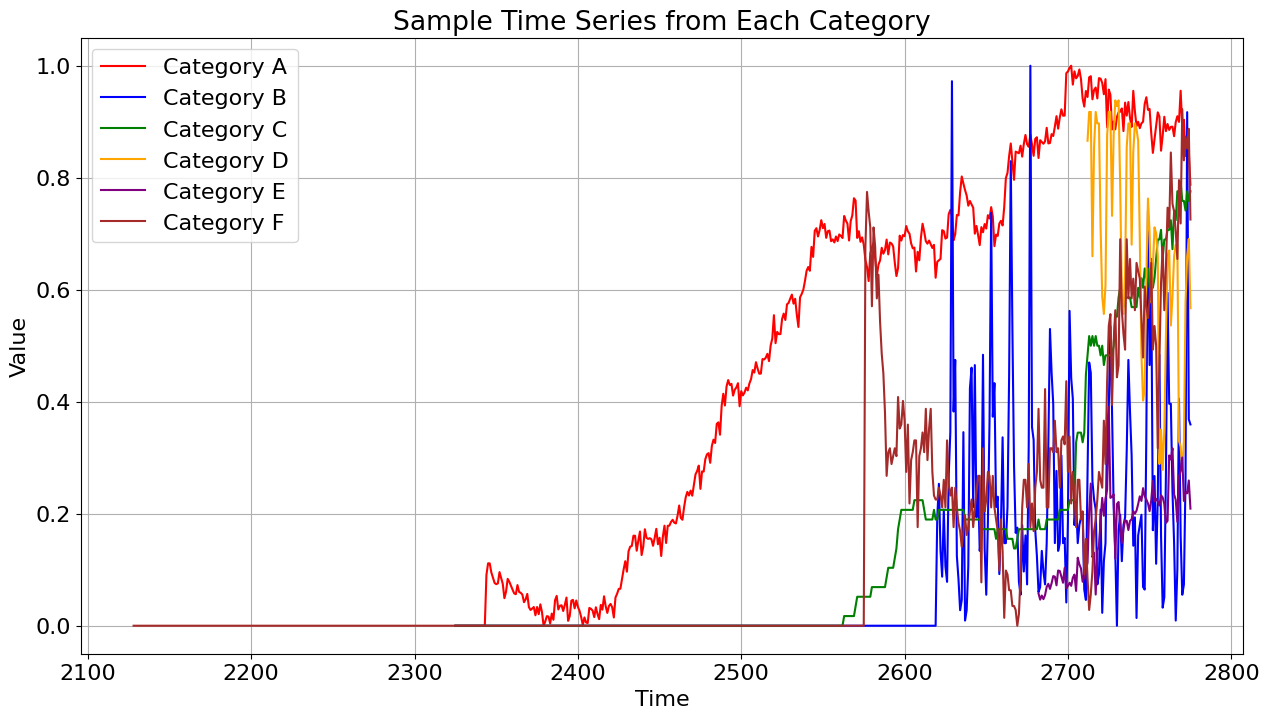

In [9]:
import pandas as pd

# Creating a DataFrame for easier handling
df = pd.DataFrame(training_data)
df['category'] = categories

# Assigning colors to each category
category_colors = {
    'A': 'red',
    'B': 'blue',
    'C': 'green',
    'D': 'orange',
    'E': 'purple',
    'F': 'brown'
}

# Sample a few time series from each category for plotting
sample_df = df.groupby('category').apply(lambda x: x.sample(n=1)).reset_index(drop=True)

# Plotting
plt.figure(figsize=(15, 8))

for _, row in sample_df.iterrows():
    start, end = valid_periods[_, :]
    time_series_data = row[:end][start:end]
    plt.plot(time_series_data, color=category_colors[row['category']], label=f"Category {row['category']}")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Sample Time Series from Each Category")
plt.legend()
plt.grid(True)
plt.show()

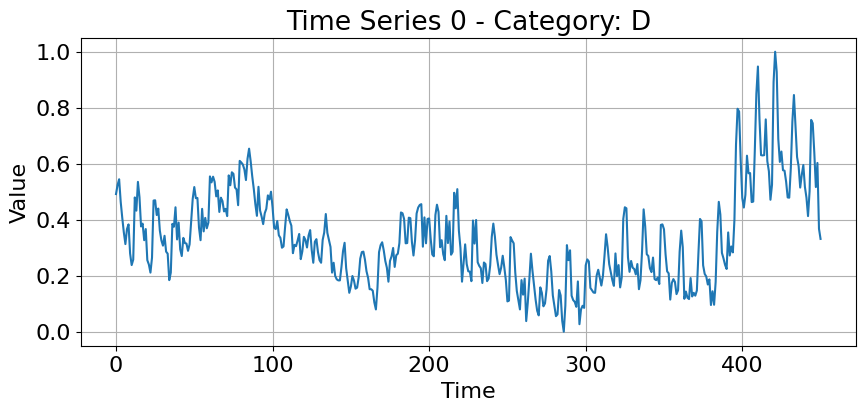

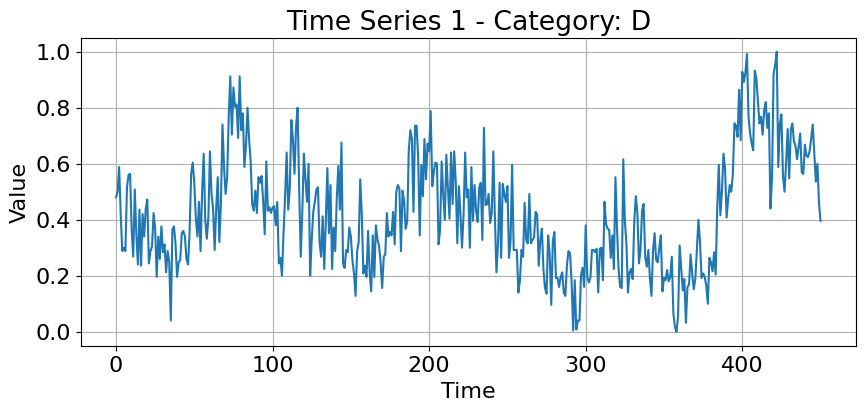

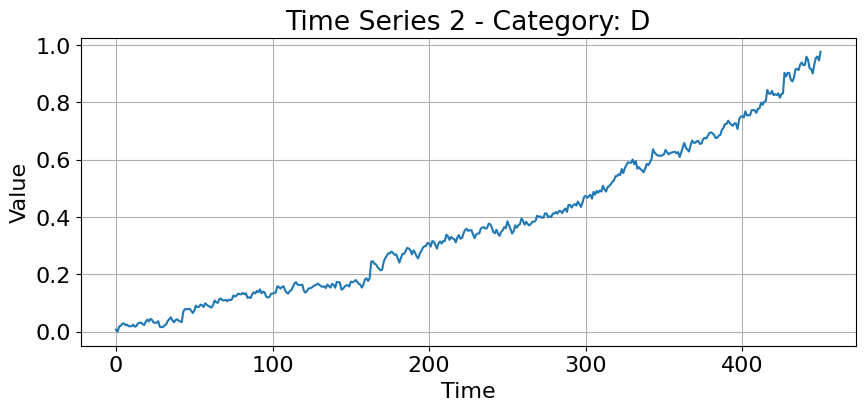

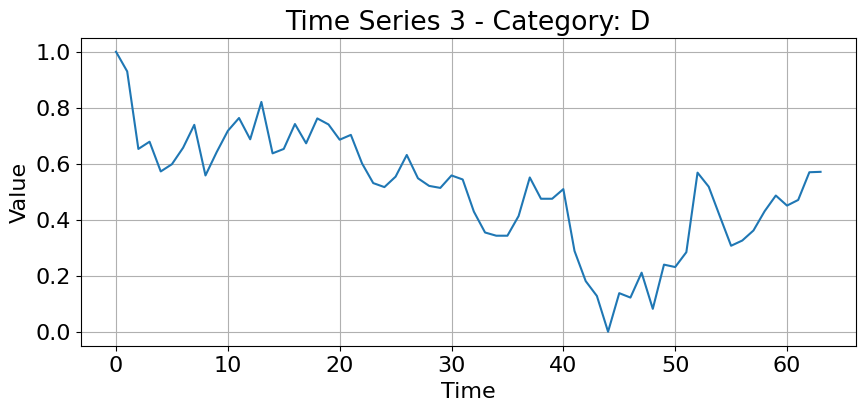

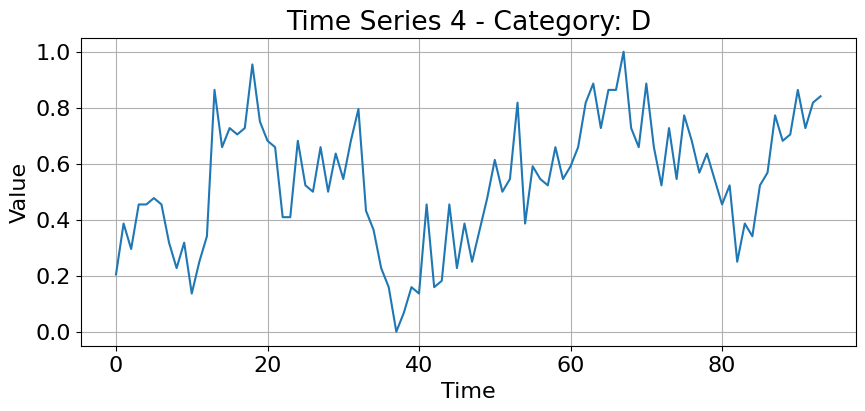

In [10]:
# Displaying the shapes of the datasets
training_data.shape, valid_periods.shape, categories.shape

# Function to plot a single time series with its category
def plot_time_series(index, data, periods, category):
    start, end = periods[index]
    time_series_data = data[index, start:end]
    plt.figure(figsize=(10, 4))
    plt.plot(time_series_data)
    plt.title(f"Time Series {index} - Category: {category}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

# Plotting first 5 time series as examples
for i in range(5):
    plot_time_series(i, training_data, valid_periods, categories[i])

## Z normalization

lets trim the data first

In [11]:
# Function to trim the time series
def trim_time_series(series, valid_period):
    start, end = valid_period
    return series[start:end]

# Apply trimming to all time series based on valid periods
trimmed_data = np.array([trim_time_series(series, period) for series, period in zip(training_data, valid_periods)])
# code to print the shape of trimmed_data and of training_data
print(trimmed_data.shape)
print(training_data.shape)
print(trimmed_data.dtype)

(48000,)
(48000, 2776)
object


In [20]:
from sklearn.preprocessing import StandardScaler

# Normalize each trimmed time series
normalized_data = []
scaler = StandardScaler()
for series in trimmed_data:
    # Normalize series
    normalized_series = scaler.fit_transform(series.reshape(-1, 1)).flatten()
    normalized_data.append(normalized_series)
normalized_data = np.array(normalized_data)
print(normalized_data.shape)

(48000,)


In [13]:
# Example: Check the first time series
print(f"Mean of the first time series after normalization: {np.mean(normalized_data[0])}")
print(f"Standard deviation of the first time series after normalization: {np.std(normalized_data[0])}")

Mean of the first time series after normalization: 1.7330310628295127e-16
Standard deviation of the first time series after normalization: 0.9999999999999999


## data visualization after normalization

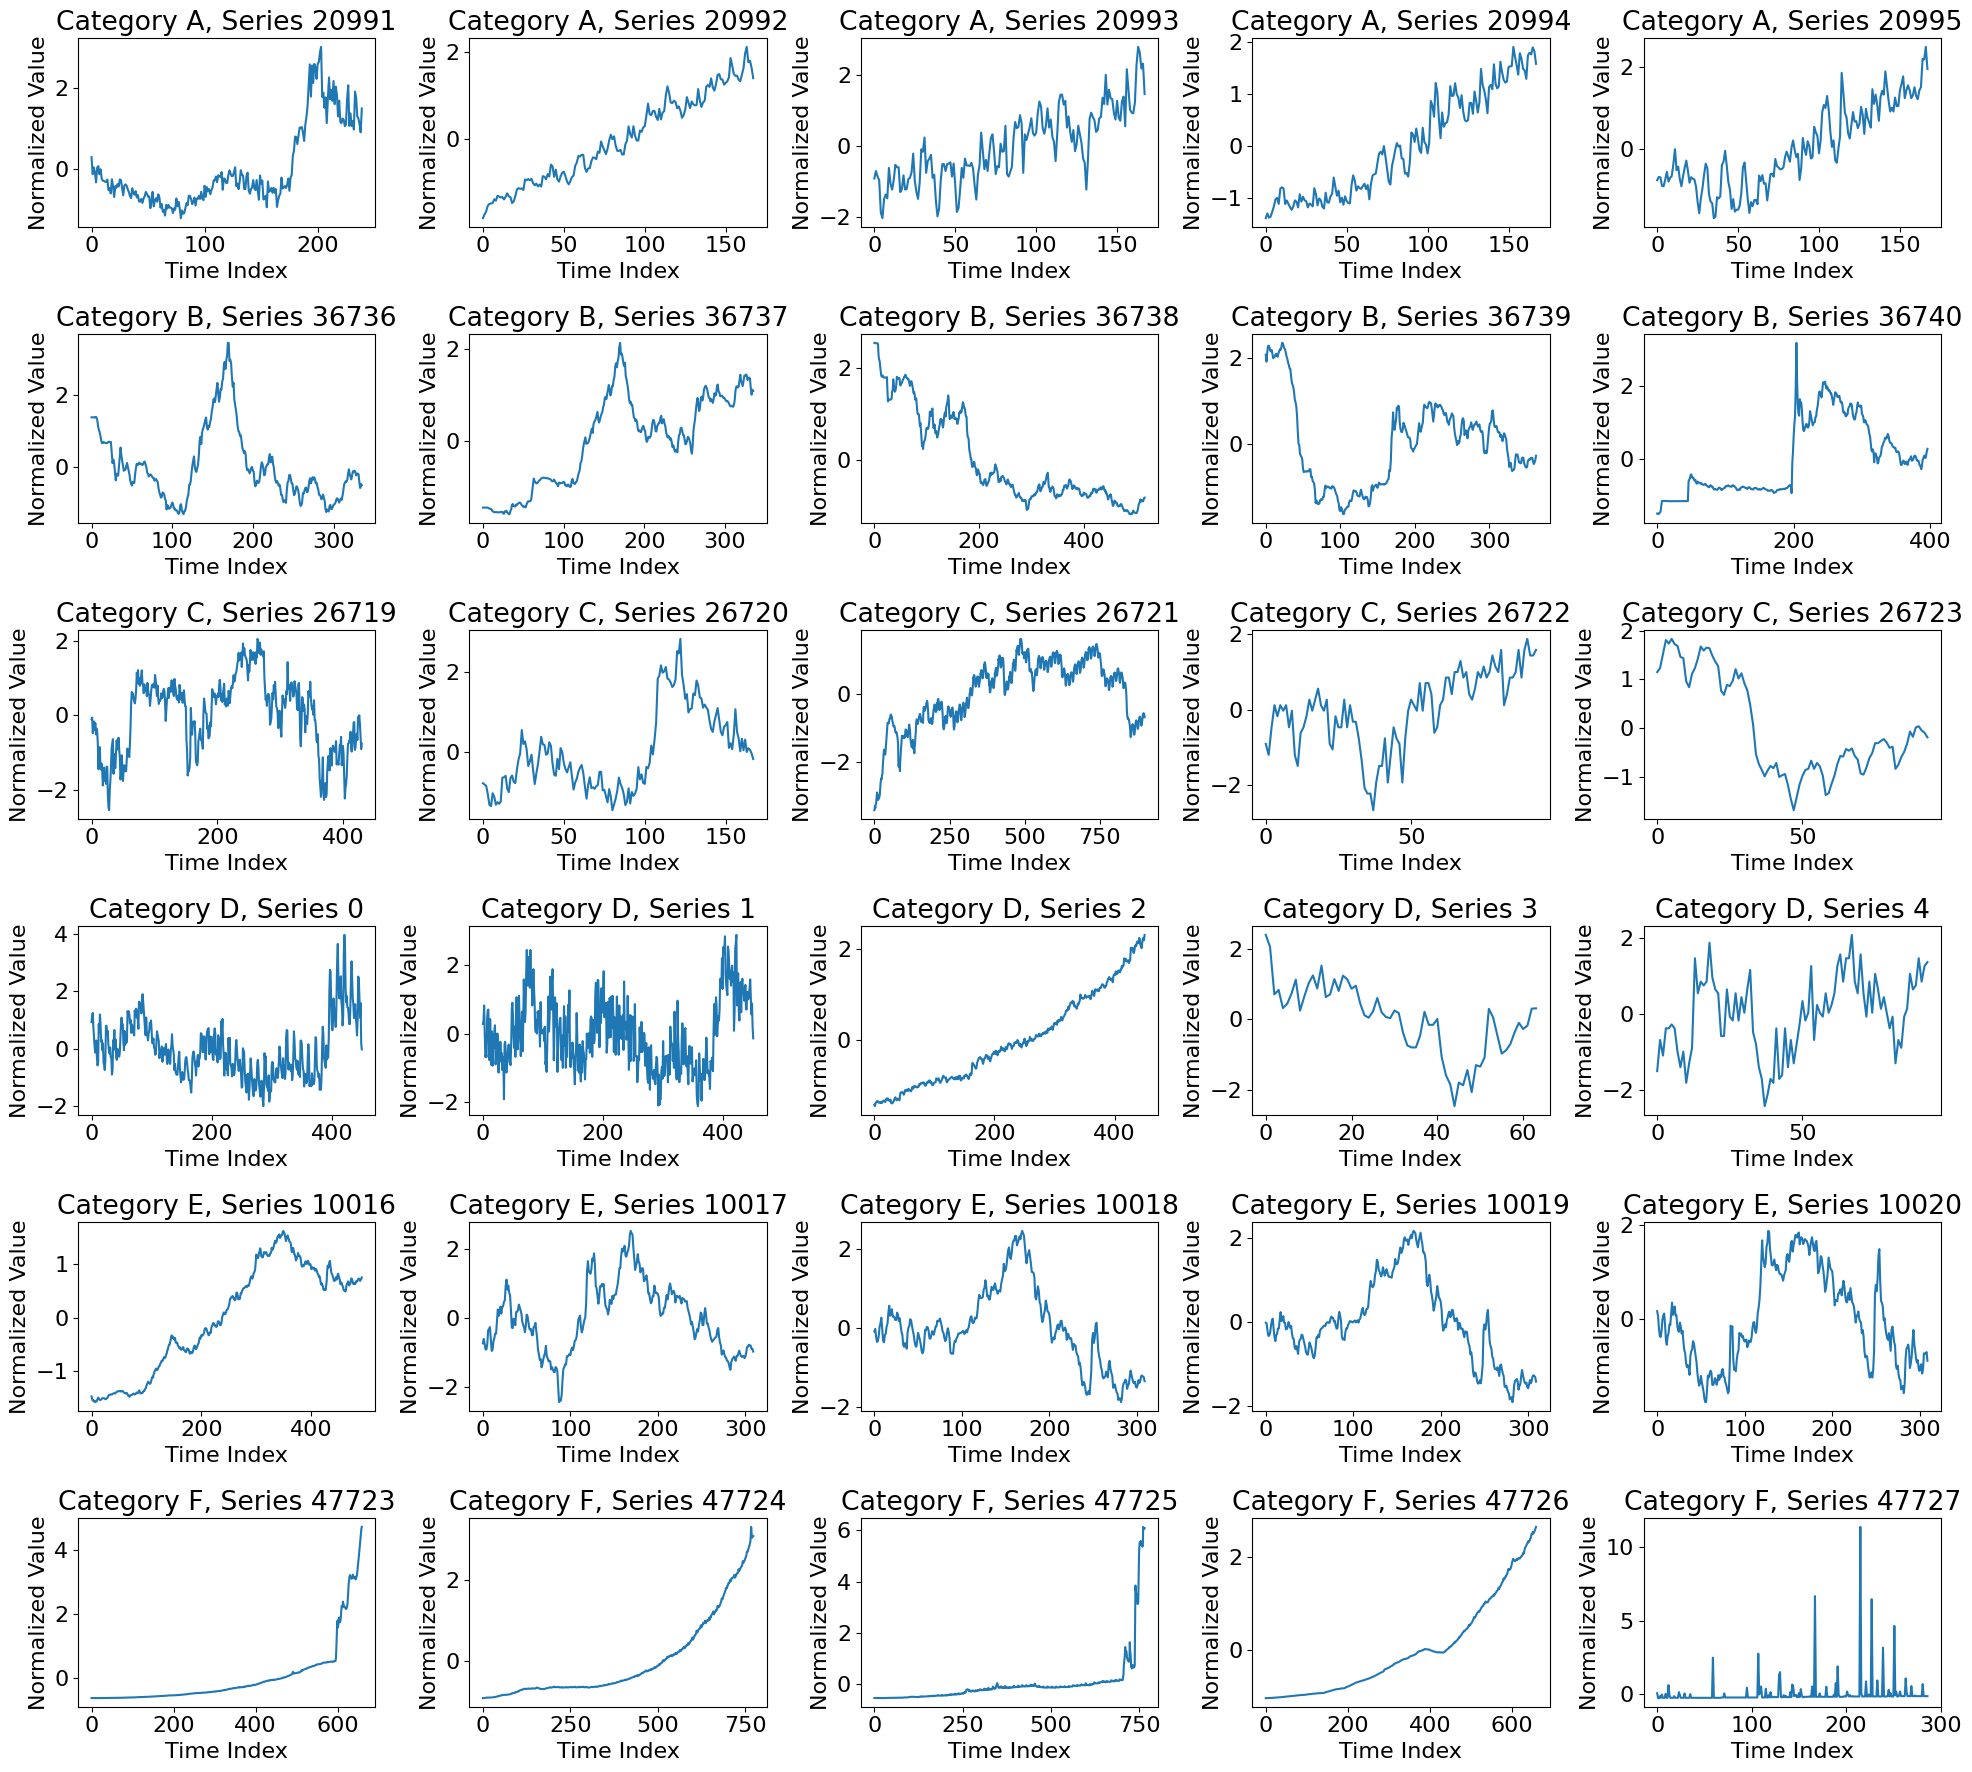

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'normalized_data' and 'categories' are already loaded into your environment

# Visualizing 5 normalized time series for each unique category
unique_categories = np.unique(categories)
selected_series_per_category = 5

fig, axes = plt.subplots(len(unique_categories), selected_series_per_category, figsize=(20, len(unique_categories) * 3))

for i, category in enumerate(unique_categories):
    # Find indices of time series belonging to the current category
    indices = np.where(categories == category)[0]
    # Select up to 5 time series from this category
    selected_indices = indices[:selected_series_per_category]
    for j, idx in enumerate(selected_indices):
        normalized_series = normalized_data[idx]
        axes[i, j].plot(normalized_series)
        axes[i, j].set_title(f"Category {category}, Series {idx}")
        axes[i, j].set_xlabel("Time Index")
        axes[i, j].set_ylabel("Normalized Value")

plt.tight_layout()
plt.show()

## prepare the sequences for training

In [21]:
def build_sequences(data, window=200, stride=20, forecast_horizon=9):
    # Ensure window size is a multiple of stride for consistent segmentation
    assert window % stride == 0

    input_sequences = []  # List to store input sequences
    output_sequences = []   # List to store output sequences (targets)

    # Check if the data length is a multiple of the window size plus forecast horizon
    for series in data:
        padding_check = (len(series) - forecast_horizon) % window
        if padding_check != 0:
            # Calculate padding length if necessary
            padding_len = window - padding_check
            # Apply padding to the series
            series = np.pad(series, (padding_len, 0), 'constant', constant_values=(0,))

        # Create sequences for model training/testing
        for idx in range(0, len(series) - window - forecast_horizon + 1, stride):
            # Extract a window of data for the input sequence
            input_sequences.append(series[idx:idx + window])
            # Extract a corresponding sequence for the output (target) sequence
            output_sequences.append(series[idx + window:idx + window + forecast_horizon])

    # Convert sequences to NumPy arrays for model compatibility
    input_sequences = np.array(input_sequences)
    output_sequences = np.array(output_sequences)

    return input_sequences, output_sequences

# Assuming normalized_data is your pre-processed and normalized dataset
input_sequences, output_sequences = build_sequences(normalized_data)
print(input_sequences.shape, output_sequences.shape)

(307440, 200) (307440, 9)


let's visualize the so built sequences that will be used for training

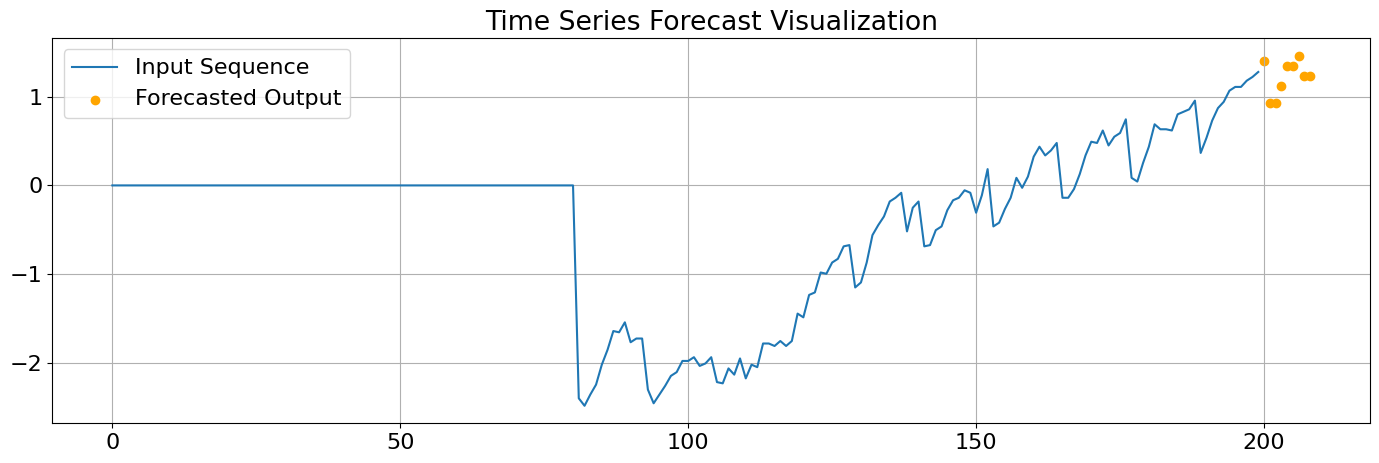

In [16]:
def inspect_time_series(input_sequences, output_sequences, forecast_horizon, idx=None):
    # Select a random index if none is provided
    if idx is None:
        idx = np.random.randint(0, len(input_sequences))

    # Set up the plot
    plt.figure(figsize=(17,5))

    # Plot the actual values from the input sequence
    plt.plot(np.arange(len(input_sequences[idx])), input_sequences[idx], label='Input Sequence')

    # Scatter plot for the predicted values (future values), colored in orange
    plt.scatter(np.arange(len(input_sequences[idx]), len(input_sequences[idx]) + forecast_horizon),
                output_sequences[idx], color='orange', label='Forecasted Output')

    # Set the title of the plot
    plt.title('Time Series Forecast Visualization')

    # Show grid for better readability
    plt.grid(True)

    # Show the legend
    plt.legend()

    # Display the plot
    plt.show()

# Example usage:
# Assuming input_sequences and output_sequences are already created from your dataset
inspect_time_series(input_sequences, output_sequences, forecast_horizon=9)

# direct forecasting

## split then build sequences for the model from the training data split

note they are exclusive here are 2 ways based on the order in which the transformations (trimming,normalization,build_sequences,splitting) are applied

In [ ]:
# trimmed-> split -> normalize -> build_seq = 0.7 con best model a 64 batch size bocciato
#aka TSNB
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming trimmed_data is your pre-processed dataset
# Split the data
split_point = int(len(trimmed_data) * 0.8)
training_data = trimmed_data[:split_point]
test_data = trimmed_data[split_point:]

# Initialize the scaler
scaler = StandardScaler()

# Normalize the training data
normalized_training_data = []
for series in training_data:
    normalized_series = scaler.fit_transform(series.reshape(-1, 1)).flatten()
    normalized_training_data.append(normalized_series)

# Normalize the test data using the same scaler
normalized_test_data = []
for series in test_data:
    normalized_series = scaler.transform(series.reshape(-1, 1)).flatten()
    normalized_test_data.append(normalized_series)

# Convert to numpy arrays if needed
normalized_training_data = np.array(normalized_training_data)
normalized_test_data = np.array(normalized_test_data)

# Function to build sequences
def build_sequences(data, window=200, stride=20, forecast_horizon=9):
    # Ensure window size is a multiple of stride for consistent segmentation
    assert window % stride == 0

    input_sequences = []  # List to store input sequences
    output_sequences = []  # List to store output sequences (targets)

    for series in data:
        padding_check = (len(series) - forecast_horizon) % window
        if padding_check != 0:
            padding_len = window - padding_check
            series = np.pad(series, (padding_len, 0), 'constant', constant_values=(0,))

        for idx in range(0, len(series) - window - forecast_horizon + 1, stride):
            input_sequences.append(series[idx:idx + window])
            output_sequences.append(series[idx + window:idx + window + forecast_horizon])

    input_sequences = np.array(input_sequences)
    output_sequences = np.array(output_sequences)

    return input_sequences, output_sequences

window = 200
stride = 20
telescope = 9
# For the training set
X_train, y_train = build_sequences(normalized_training_data, window=200, stride=20, forecast_horizon=9)

# For the testing set
X_test, y_test = build_sequences(normalized_test_data, window=200, stride=20, forecast_horizon=9)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(271870, 200) (271870, 9) (35570, 200) (35570, 9)


skip the next line for now

In [33]:
#preferred by chatgpt and used until now
#aka TNSB
window = 200
stride = 20
telescope = 9
#trimmed->normalize->split->build_seq
split_point = int(len(normalized_data) * 0.8)  # 80% for training, 20% for testing
normalized_data_train = normalized_data[:split_point]
normalized_data_test = normalized_data[split_point:]
# Assuming you also have a corresponding array of target data
targets_train = output_sequences[:split_point]
targets_test = output_sequences[split_point:]
# For the training set
X_train, y_train = build_sequences(normalized_data_train, window=window, stride=stride, forecast_horizon=telescope)
# For the testing set
X_test, y_test = build_sequences(normalized_data_test, window=window, stride=stride, forecast_horizon=telescope)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(271870, 200) (271870, 9) (35570, 200) (35570, 9)


## LSTM model definition

In [34]:
from tensorflow.keras.layers import Input, Conv1D, LSTM, Bidirectional, Dense, Reshape
from tensorflow.keras.models import Model


def build_CONV_LSTM_model(input_shape, output_shape):
    input_layer = Input(shape=input_shape, name='input_layer')

    # First Convolution layer
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)

    # Second Convolution layer
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x)

    # Bidirectional LSTM layer
    x = Bidirectional(LSTM(64, return_sequences=False))(x)

    # Dense layer and reshape to match the desired output shape
    x = Dense(output_shape[0] * output_shape[1])(x)

    output_layer = Reshape(output_shape)(x)
    # Construct the model
    model = Model(inputs=input_layer, outputs=output_layer, name='CONV_LSTM_model')
    # Compile the model with Mean Squared Error loss and Adam optimizer
    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

# Define the input and output shapes

input_shape = (200, 1) # Input shape: 200 time steps, 1 feature
output_shape = (9, 1) # Output shape: 9 time steps, 1 feature (forecast horizon)

# Build the model
conv_lstm_model = build_CONV_LSTM_model(input_shape, output_shape)

In [35]:
conv_lstm_model.summary()

Model: "CONV_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 200, 1)]          0         
                                                                 
 conv1d_4 (Conv1D)           (None, 200, 64)           256       
                                                                 
 conv1d_5 (Conv1D)           (None, 200, 64)           12352     
                                                                 
 bidirectional_2 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 9)                 1161      
                                                                 
 reshape_2 (Reshape)         (None, 9, 1)              0         
                                                   

In [ ]:
# Define your model hyperparameters
batch_size = 64  # This is a typical batch size; adjust as necessary for your dataset
epochs = 100     # The number of epochs to train; adjust based on when you see convergence

# Assuming conv_lstm_model is the model you have built using the build_CONV_LSTM_model function
history = conv_lstm_model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=0.1,  # Use 10% of the training data for validation
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=12, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=10, factor=0.1, min_lr=1e-5)
    ]
).history

# After training, you can use the history object to plot training and validation loss curves

Epoch 1/100
3824/3824 [==============================] - 72s 17ms/step - loss: 0.2037 - val_loss: 0.1675 - lr: 0.0010
Epoch 2/100
3494/3824 [==========================>...] - ETA: 5s - loss: 0.1790

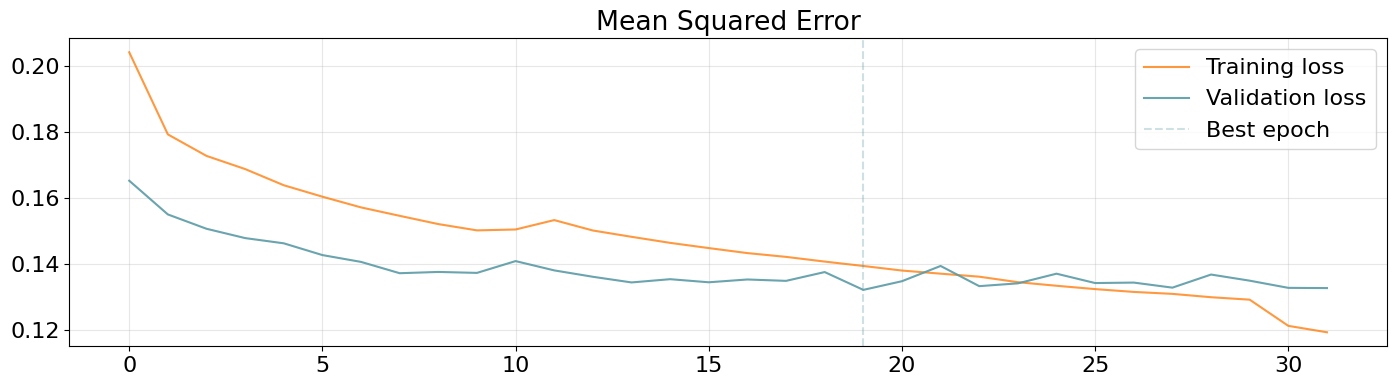

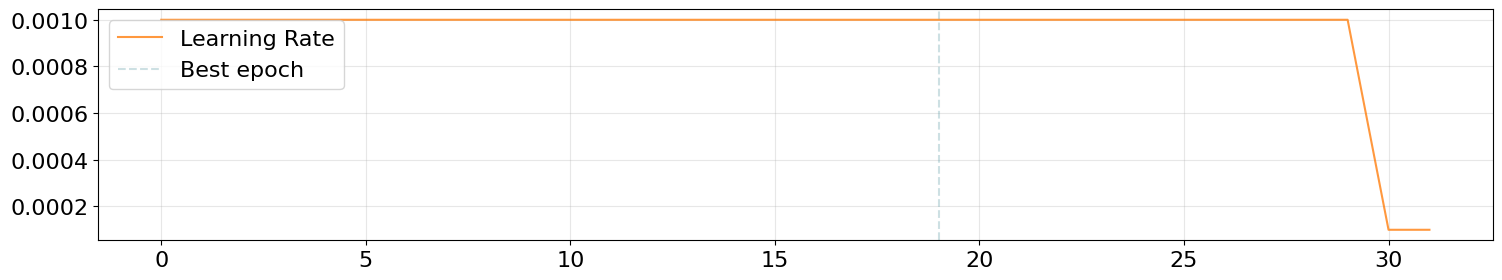

In [ ]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

## model save and reload

In [30]:
%cd /content/drive/MyDrive/challenge2/Challenge2_Luca

/content/drive/.shortcut-targets-by-id/1Mxsv_mldVrJPtq1ffnBJa77i4c5Pgx9f/challenge2/Challenge2_Luca


save the model weights and then reload the model, i dont know why exactly but the normal save dont work

In [31]:
conv_lstm_model.save_weights('modelBestTNBS_weights.h5')

In [32]:
# Recreate the model architecture
model = build_CONV_LSTM_model(input_shape, output_shape)
# Load the saved weights
model.load_weights('modelBestTNBS_weights.h5')
#save the model
modelSavePath = "/content/drive/MyDrive/challenge2/Challenge2_Luca/modelBestTNBS"
model.save(modelSavePath)

## test evaluation

In [ ]:
# Predict the test set using the model
predictions = model.predict(X_test, verbose=0)

# Print the shape of the predictions
print(f"Predictions shape: {predictions.shape}")

print(y_test.shape)

# Calculate and print Mean Squared Error (MSE)
mean_squared_error = tfk.metrics.mean_squared_error(y_test.flatten(), predictions.flatten()).numpy()
print(f"Mean Squared Error: {mean_squared_error}")

# Calculate and print Mean Absolute Error (MAE)
mean_absolute_error = tfk.metrics.mean_absolute_error(y_test.flatten(), predictions.flatten()).numpy()
print(f"Mean Absolute Error: {mean_absolute_error}")

Predictions shape: (37150, 2, 1)
(37150, 2)
Mean Squared Error: 0.1797194480895996
Mean Absolute Error: 0.21024635434150696


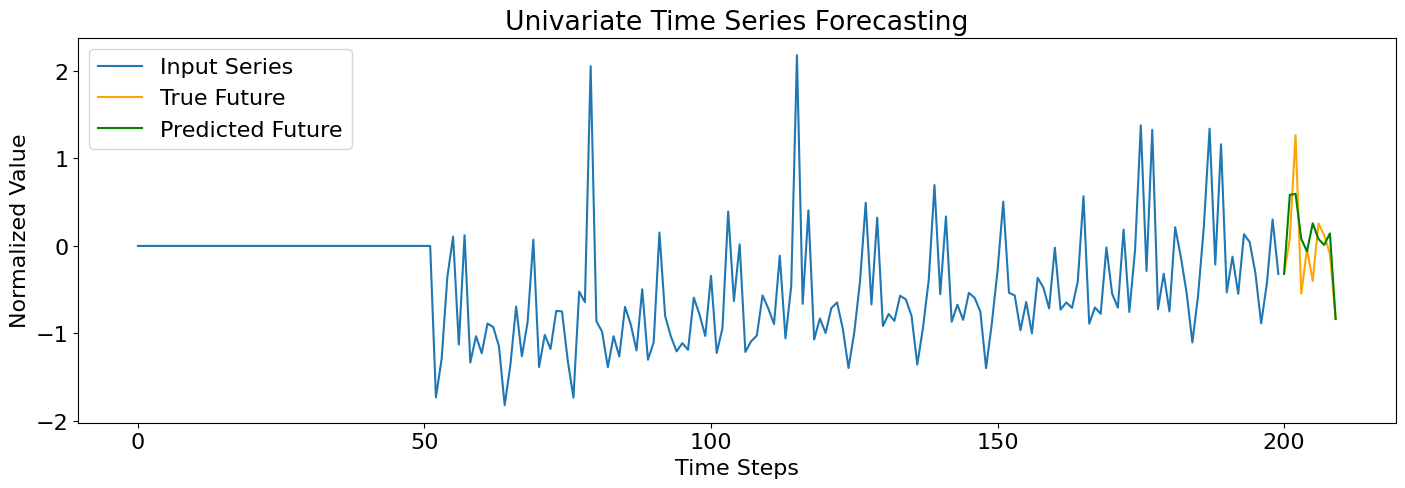

In [ ]:
def inspect_univariate_prediction(X, y, pred, forecast_horizon, idx=None):
    if idx is None:
        idx = np.random.randint(0, len(X))

    # Extend the last point in the input series to connect it with the prediction
    last_input_point = X[idx, -1]  # Last point of the input sequence
    last_input_point = np.array([last_input_point])  # Convert to a 1D array

    # Ensure pred and y are 1D arrays for concatenation
    pred = np.squeeze(pred) if pred.ndim > 1 else pred
    y = np.squeeze(y) if y.ndim > 1 else y

    # Concatenate the last input point with the predictions and true values
    extended_pred = np.concatenate([last_input_point, pred[idx]], axis=0)
    extended_true = np.concatenate([last_input_point, y[idx]], axis=0)

    # Plotting the sequences
    plt.figure(figsize=(17, 5))
    input_time_steps = np.arange(len(X[idx]))
    future_time_steps = np.arange(len(X[idx]), len(X[idx]) + forecast_horizon + 1)
    plt.plot(input_time_steps, X[idx], label='Input Series')
    plt.plot(future_time_steps, extended_true, color='orange', label='True Future')
    plt.plot(future_time_steps, extended_pred, color='green', label='Predicted Future')
    plt.title('Univariate Time Series Forecasting')
    plt.xlabel('Time Steps')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.show()

# Usage
# Assuming 'predictions' is the array of predictions from your model
telescope = 9
inspect_univariate_prediction(X_test, y_test, predictions, telescope)

# Multivariate Forecasting (Autoregression)

In [ ]:
autoregressive_telescope = 2
assert autoregressive_telescope < telescope

In [ ]:
window = 200
stride = 20

split_point = int(len(normalized_data) * 0.8)  # 80% for training, 20% for testing
normalized_data_train = normalized_data[:split_point]
normalized_data_test = normalized_data[split_point:]

# Assuming you also have a corresponding array of target data
targets_train = output_sequences[:split_point]
targets_test = output_sequences[split_point:]

# For the training set
X_train, y_train = build_sequences(normalized_data_train, window=window, stride=stride, forecast_horizon=autoregressive_telescope)

# For the testing set
X_test, y_test = build_sequences(normalized_data_test, window=window, stride=stride, forecast_horizon=autoregressive_telescope)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(279380, 200) (279380, 2) (37150, 200) (37150, 2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def inspect_univariate(X, y, telescope, idx=None):
    if idx is None:
        idx = np.random.randint(0, len(X))

    plt.figure(figsize=(17, 6))

    # Plot the input sequence
    plt.plot(np.arange(len(X[idx])), X[idx], label='Input Sequence')

    # Plot the target values
    plt.scatter(np.arange(len(X[idx]), len(X[idx]) + telescope), y[idx], color='orange', label='Target')

    plt.title('Univariate Time Series Inspection')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

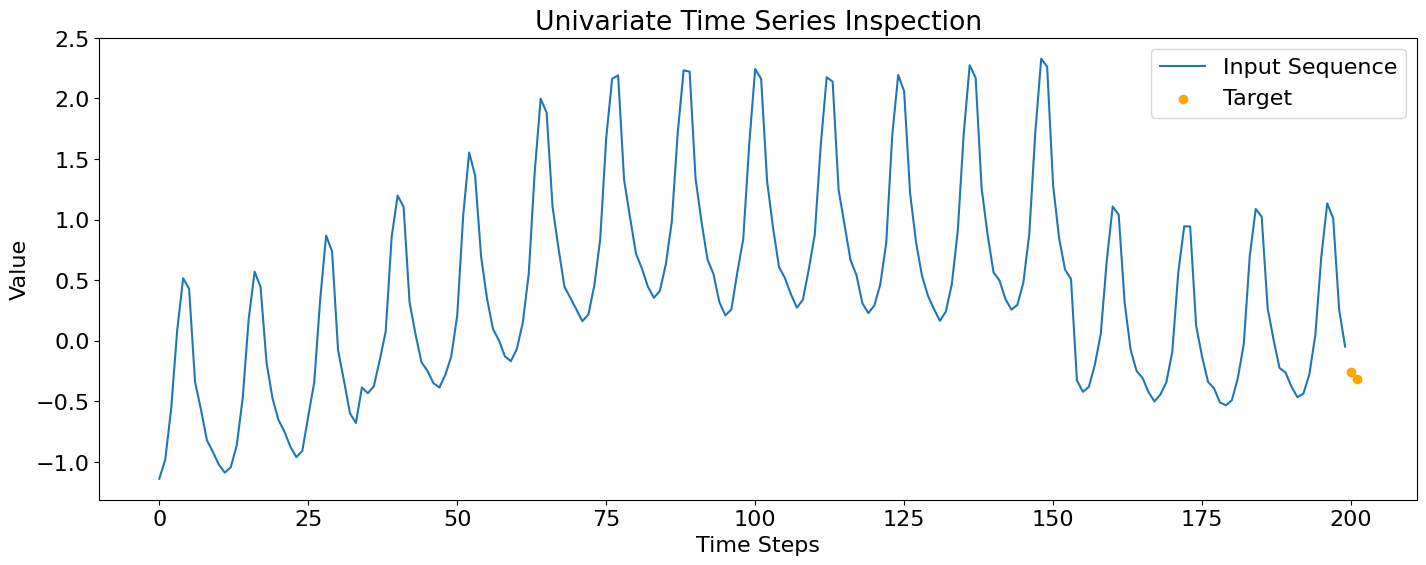

In [ ]:
inspect_univariate(X_train, y_train, autoregressive_telescope)

In [ ]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1:]
print(input_shape, output_shape)
batch_size = 64
epochs = 200

# Define the input and output shapes
input_shape = (window, 1)  # Input shape: 200 time steps, 1 feature
output_shape = (autoregressive_telescope, 1)   # Output shape: 9 time steps, 1 feature (forecast horizon)

(200,) (2,)


In [ ]:
model = build_CONV_LSTM_model(input_shape, output_shape)
model.summary()
#tfk.utils.plot_model(model, expand_nested=True, show_shapes=True)

Model: "CONV_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 200, 1)]          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 200, 64)           256       
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
 reshape_1 (Reshape)         (None, 2, 1)              0         
                                                                 
Total params: 66562 (260.01 KB)
Trainable params: 66562 (260.01 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [ ]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=12, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=10, factor=0.1, min_lr=1e-5)
    ]
).history

Epoch 1/200
3929/3929 [==============================] - 88s 19ms/step - loss: 0.1429 - val_loss: 0.1001 - lr: 0.0010
Epoch 2/200
3929/3929 [==============================] - 82s 21ms/step - loss: 0.1207 - val_loss: 0.0931 - lr: 0.0010
Epoch 3/200
3929/3929 [==============================] - 80s 20ms/step - loss: 0.1135 - val_loss: 0.0877 - lr: 0.0010
Epoch 4/200
3929/3929 [==============================] - 75s 19ms/step - loss: 0.1093 - val_loss: 0.0867 - lr: 0.0010
Epoch 5/200
3929/3929 [==============================] - 81s 21ms/step - loss: 0.1064 - val_loss: 0.0815 - lr: 0.0010
Epoch 6/200
3929/3929 [==============================] - 69s 18ms/step - loss: 0.1038 - val_loss: 0.0812 - lr: 0.0010
Epoch 7/200
3929/3929 [==============================] - 67s 17ms/step - loss: 0.1022 - val_loss: 0.0796 - lr: 0.0010
Epoch 8/200
3929/3929 [==============================] - 66s 17ms/step - loss: 0.1026 - val_loss: 0.0833 - lr: 0.0010
Epoch 9/200
3929/3929 [==============================] -

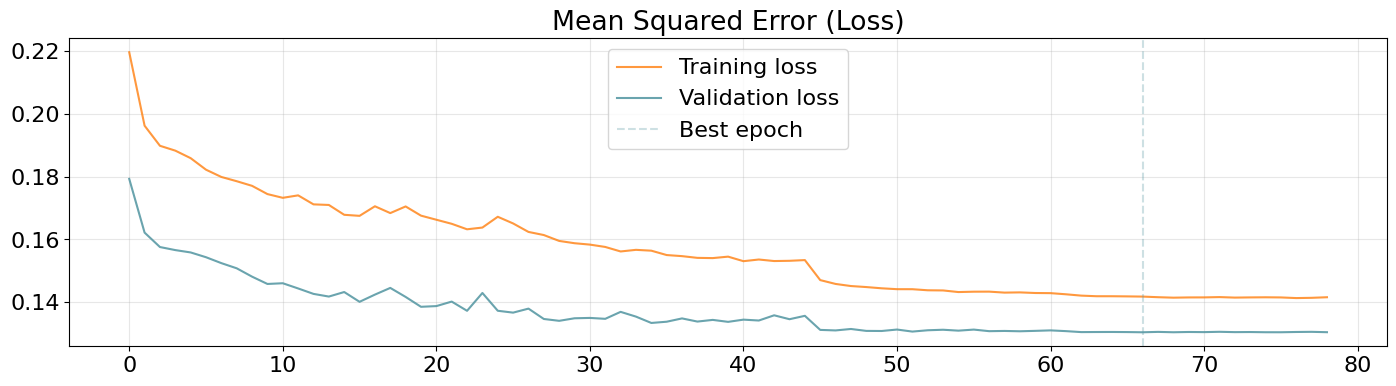

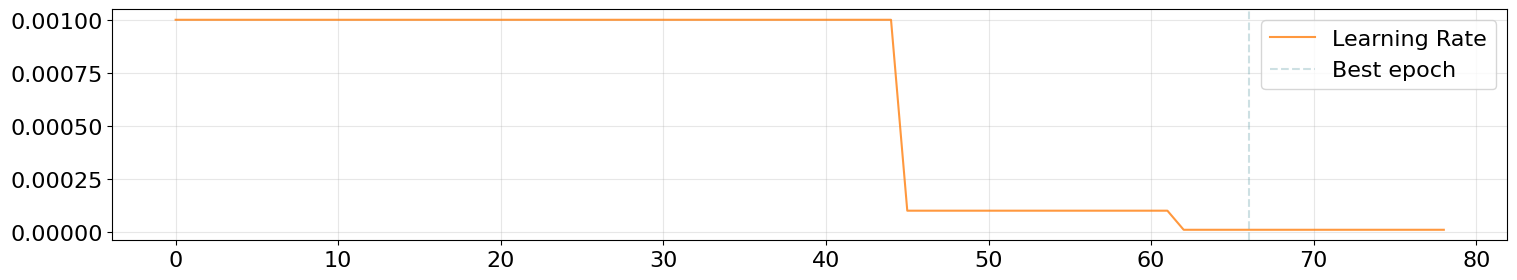

In [ ]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
conv_lstm_model.save_weights('AutoRegressiveLSTM_weights.h5')
# Recreate the model architecture

#save the model
modelSavePath = "/content/drive/MyDrive/challenge2/model2"
model.save(modelSavePath)

In [ ]:
#load the model
tf.keras.models.load_model('/content/drive/MyDrive/challenge2/Challenge2_Luca/submissionFolderAR/SubmissionModel')

In [ ]:
#reload the model
model = build_CONV_LSTM_model(input_shape, output_shape)
# Load the saved weights
model.load_weights('AutoRegressiveLSTM_weights.h5')

ValueError: ignored

In [ ]:
# model.save('AuroregressiveForecasting')
#model = tfk.models.load_model('AuroregressiveForecasting')

In [ ]:
# Predict the test set using the model
predictions = model.predict(X_test, verbose=0)

# Print the shape of the predictions
print(f"Predictions shape: {predictions.shape}")

print(y_test.shape)

# Calculate and print Mean Squared Error (MSE)
mean_squared_error = tfk.metrics.mean_squared_error(y_test.flatten(), predictions.flatten()).numpy()
print(f"Mean Squared Error: {mean_squared_error}")

# Calculate and print Mean Absolute Error (MAE)
mean_absolute_error = tfk.metrics.mean_absolute_error(y_test.flatten(), predictions.flatten()).numpy()
print(f"Mean Absolute Error: {mean_absolute_error}")

Predictions shape: (37150, 2, 1)
(37150, 2)
Mean Squared Error: 1.1687679290771484
Mean Absolute Error: 0.8590027689933777


In [ ]:
#should be X_test_raw ie forse normalized_test
X_test_reg, y_test_reg = build_sequences(normalized_data_test, window, stride, autoregressive_telescope)
X_test_reg.shape, y_test_reg.shape

((37150, 200), (37150, 2))

In [ ]:
# Autoregressive Forecasting
reg_predictions = np.array([])
X_temp = X_test_reg
for reg in range(0,telescope,autoregressive_telescope):
    pred_temp = model.predict(X_temp,verbose=0)
    if(len(reg_predictions)==0):
        reg_predictions = pred_temp
    else:
        reg_predictions = np.concatenate((reg_predictions,pred_temp),axis=1)
    X_temp = np.concatenate((X_temp[:,autoregressive_telescope:,:],pred_temp), axis=1)

IndexError: ignored

In [ ]:
# Print the shape of the predictions
print(f"Predictions shape: {reg_predictions.shape}")

# Calculate and print Mean Squared Error (MSE)
mean_squared_error = tfk.metrics.mean_squared_error(y_test_reg.flatten(), reg_predictions.flatten()).numpy()
print(f"Mean Squared Error: {mean_squared_error}")

# Calculate and print Mean Absolute Error (MAE)
mean_absolute_error = tfk.metrics.mean_absolute_error(y_test_reg.flatten(), reg_predictions.flatten()).numpy()
print(f"Mean Absolute Error: {mean_absolute_error}")

Predictions shape: (730, 50, 3)
Mean Squared Error: 0.0045051067136228085
Mean Absolute Error: 0.04832511022686958


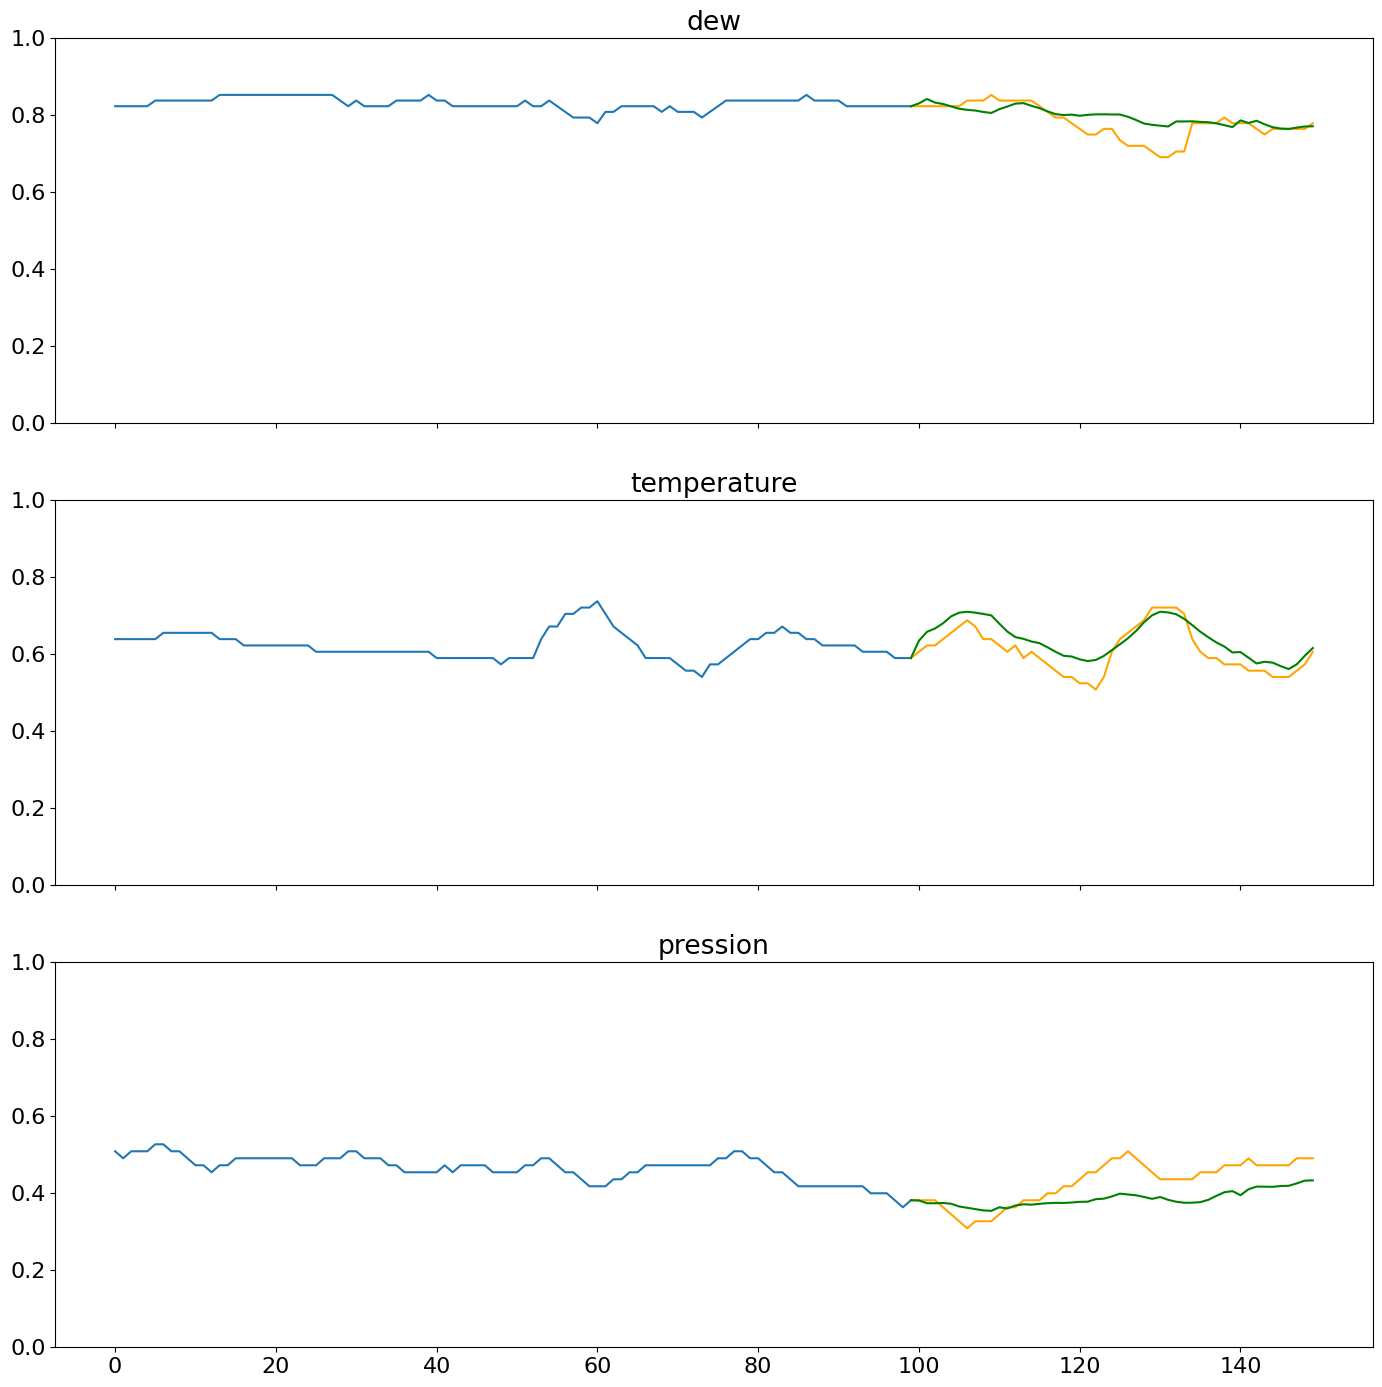

In [ ]:
inspect_multivariate_prediction(X_test_reg, y_test_reg, reg_predictions, target_labels, telescope)

predict the future

In [ ]:
maes = []
for i in range(reg_predictions.shape[1]):
    ft_maes = []
    for j in range(reg_predictions.shape[2]):
        ft_maes.append(np.mean(np.abs(y_test_reg[:,i,j]-reg_predictions[:,i,j]), axis=0))
    ft_maes = np.array(ft_maes)
    maes.append(ft_maes)
maes = np.array(maes)

In [ ]:
# Autoregressive Forecasting (Future)
reg_future = np.array([])
X_temp = future # The sequence to forecast
for reg in range(0,telescope,autoregressive_telescope): # For each telescope step (i.e., reg_telescope%telescope is preferred to be 0)
    pred_temp = model.predict(X_temp,verbose=0) # Predict the current sequence
    if(len(reg_future)==0):
        reg_future = pred_temp # Initialize the forecasting
    else:
        reg_future = np.concatenate((reg_future,pred_temp),axis=1) # Append the prediction to the whole forecasting
    X_temp = np.concatenate((X_temp[:,autoregressive_telescope:,:],pred_temp), axis=1) # Shift the input of the next predict so that the just predicted sequence is at the end of the input, and the dimention is correct

In [ ]:
reg_future = np.concatenate([np.expand_dims(future[:,-1,:],axis=0),reg_future],axis=1)
maes = np.concatenate([np.array([[0,0,0]]),maes],axis=0)

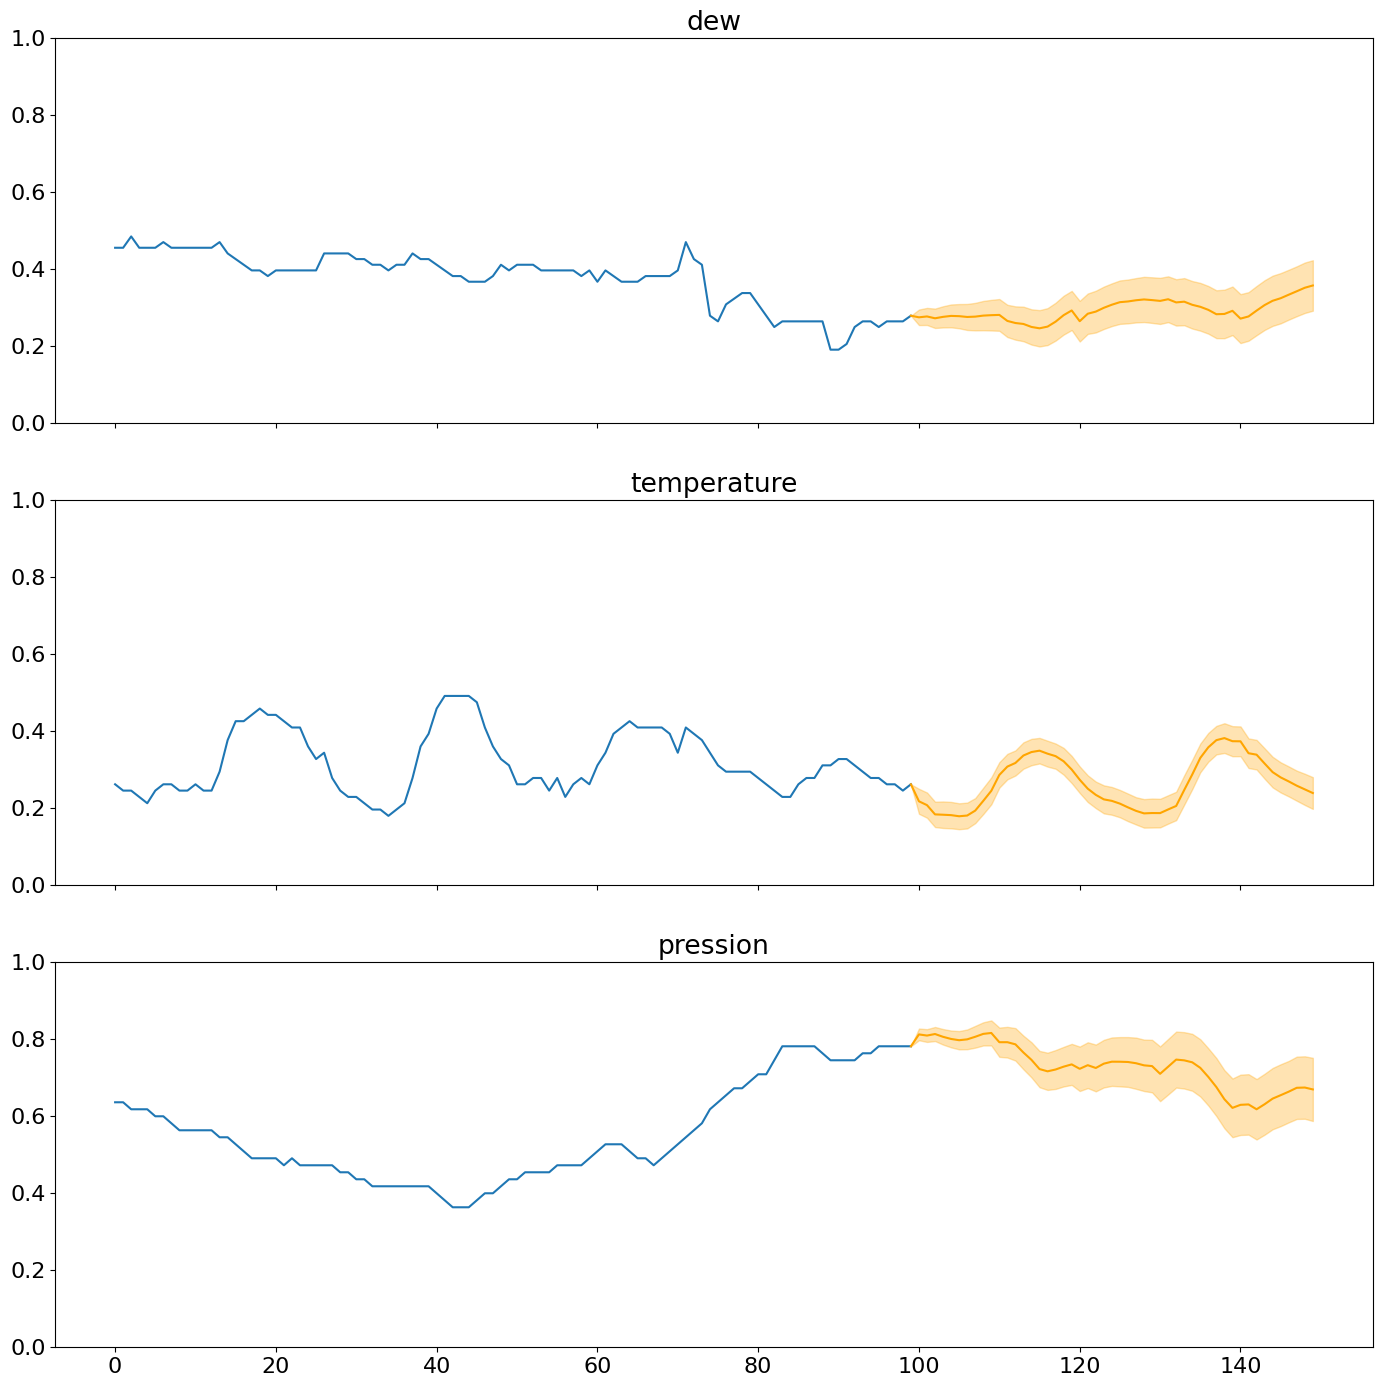

In [ ]:
figs, axs = plt.subplots(len(target_labels), 1, sharex=True, figsize=(17,17))
for i, col in enumerate(target_labels):
    axs[i].plot(np.arange(len(future[0,:,i])), future[0,:,i])
    axs[i].plot(np.arange(len(future[0,:,i])-1, len(future[0,:,i])+telescope), reg_future[0,:,i], color='orange')
    axs[i].fill_between(
        np.arange(len(future[0,:,i])-1, len(future[0,:,i])+telescope),
        reg_future[0,:,i]+maes[:,i],
        reg_future[0,:,i]-maes[:,i],
        color='orange', alpha=.3)
    axs[i].set_title(col)
    axs[i].set_ylim(0,1)
plt.show()

Try realising new architectures with recurrent and convolutional blocks, perhaps inspired by the CNNs seen in previous lessons. And remember: Attention may be all you need, semicit.

*Credits: Eugenio Lomurno, 📧 eugenio.lomurno@polimi.it*